# <b> Chapter 10

In [107]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import statistics
import random
import math

## Exploring Your Data

In [108]:
# Loading the data

f = open('ReceitasGoias2022.csv', 'r', encoding='utf-8')
data = pd.read_csv(f, index_col=False, sep=';')
data.dtypes


ALINEA                      object
CATEGORIA_ECONOMICA         object
CODG_ALINEA                  int64
CODG_CATEGORIA_ECONOMICA     int64
CODG_ESPECIE                 int64
CODG_NATUREZA_RECEITA        int64
CODG_ORIGEM                  int64
CODG_RUBRICA                 int64
CODG_SUBALINEA               int64
ESPECIE                     object
ORIGEM                      object
RUBRICA                     object
SUBALINEA                   object
CODG_ORGAO                   int64
NOME_ORGAO                  object
RECEITA_PREVISTA_LOA         int64
RECEITA_REALIZADA            int64
DATA                        object
dtype: object

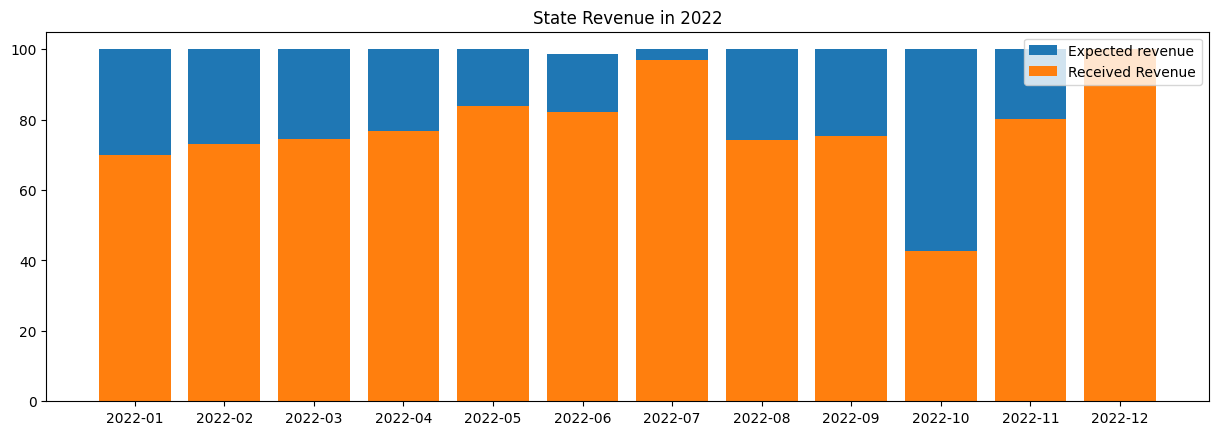

In [109]:
# Lets first see how all the expected revenue is distributed percentually per month

er = data.groupby('DATA', as_index=False).aggregate({'RECEITA_PREVISTA_LOA': 'sum'})
er['DATA'] = er['DATA'].map(lambda x: x[:7])

rr = data.groupby('DATA', as_index=False).aggregate({'RECEITA_REALIZADA': 'sum'})
rr['DATA'] = rr['DATA'].map(lambda x: x[:7])

plt.figure().set_figwidth(15)
plt.bar(er['DATA'], er['RECEITA_PREVISTA_LOA'].map(lambda x: 100*x/max(er['RECEITA_PREVISTA_LOA'])), label='Expected revenue')
plt.bar(rr['DATA'], rr['RECEITA_REALIZADA'].map(lambda x: 100*x/max(rr['RECEITA_REALIZADA'])), label='Received Revenue')
plt.legend(loc='upper right')
plt.title('State Revenue in 2022')
plt.show()

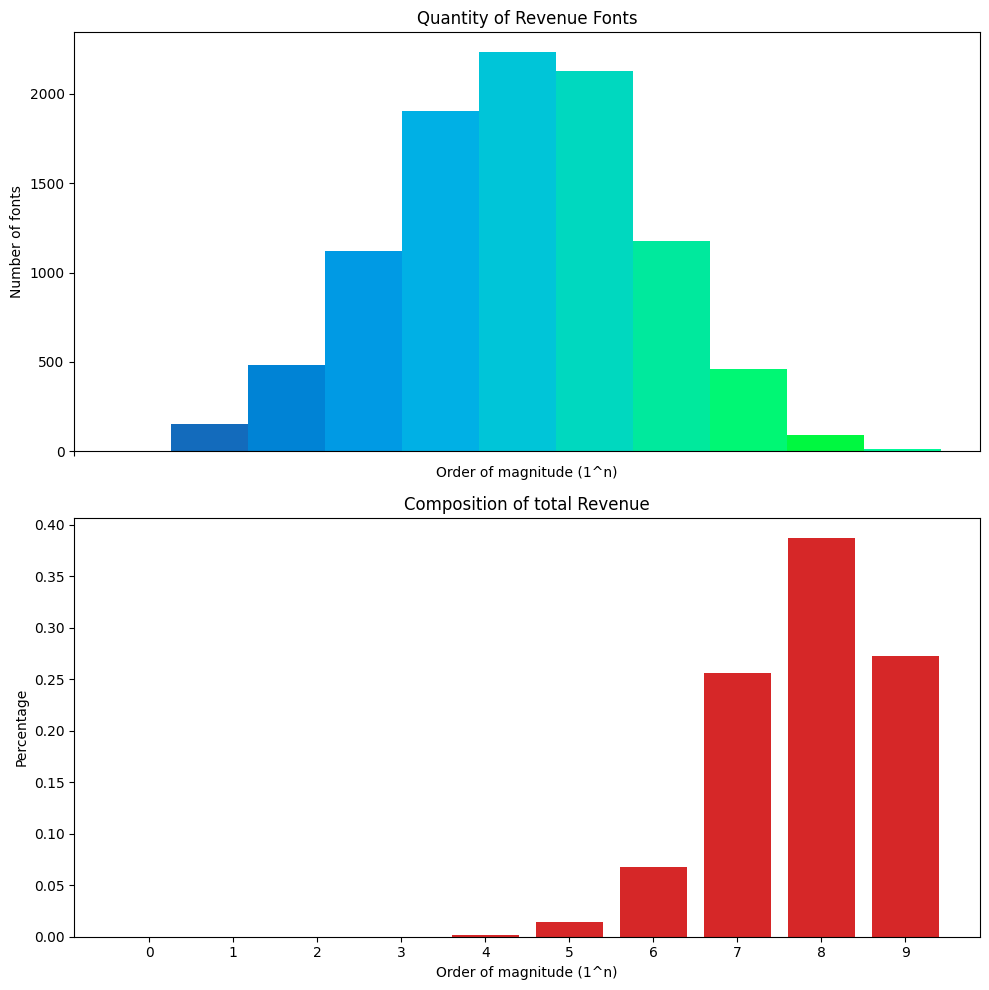

In [150]:
# Working with the realized revenue (bucketing)

def bucketing(data: pd.Series) -> list:
    """Buckets the series to n buckets of the magnitude of the max value"""
    n = data.max()
    p = len(str(abs(n))) - 1
    buckets = []
    for i in range(p+1):
        mask = ((data / 10 ** i) < 10) & ((data / 10 ** i) >= 1)
        buckets.append(data[mask])
    return buckets


dt = bucketing(data['RECEITA_REALIZADA'])
fig, ax = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)

interval_labels = [f'{i}' for i in range(len(dt))]
ax[0].hist(dt, bins=1, color=['#136bbc', '#0083d5', '#009ae4',
           '#00b0e5', '#00c5d8', '#00d8bf', '#00e99d', '#00f774', '#00f840', '#00f999'])
ax[0].set_xlabel('Order of magnitude (1^n)')
ax[0].set_ylabel('Number of fonts')
ax[0].set_title('Quantity of Revenue Fonts')
ax[0].set_xticklabels([])
ax[0].set_xticks([1])

total = [x.sum() for x in dt]
m = sum(total)
total = [x/m for x in total]

ax[1].bar(interval_labels, height=total, color='C3')
ax[1].set_xlabel('Order of magnitude (1^n)')
ax[1].set_title('Composition of total Revenue')
ax[1].set_ylabel('Percentage')
plt.show()